# Predict shoulder prognosis from prosthesis position

Predict each of those clinical outcome:
- AFE = forward elevation in degree, the higher the better
- AIR = highest vertebra touched, BUTTOCK < SI < ... < L3 < ... < T12 < T8
- AER = external rotation in degree, the higher the better
- PAIN = felt pain, the higher the worst
- CST = fonctional score, the higher the better

from the preop/postop prosthesis position: 
- LSA (lateralisation angle)
- DSA (distalisation angle)
- GT-glenoide
- CDR-glenoide
- H: acromi
- L: Acromi
- beta angle
- tilt horzontal (angle negatif vers le haut, pas bien)
- tilt fosse (angle negatif qd omoplate regarde vers le haut)
- CSA (only preop)
- do not take CDR GT (hidden)

Is there a position that gives best result for 1/ everyone or 2/ with respect to preop data ?


In [76]:
import pandas as pd

xls = pd.ExcelFile('./Stats_David_new.xlsx')
patients = pd.read_excel(xls, 'Datas and History', header=2)
patients = patients[['No.', 'INCLUDE']]
print(f"Number of included patients: {patients[patients['INCLUDE'] == 1.0].shape[0]}")

Number of included patients: 101


In [77]:
# clinical outcomes to predict...
y = pd.read_excel(xls, 'COMPL+Clinic FU', header=2)
yincl = pd.merge(y, patients, on='No.')
y = yincl.loc[yincl['INCLUDE'] == 1.0]
y = y[['No.', 'A FE °', 'A IR (Hand)', 'A ER°', 'Pain ', 'Total']]
y.columns = ['No.', 'yAFE', 'yAIR', 'yAER', 'yPain', 'yTotal']

In [78]:
# ...from prosthesis position
preX = pd.read_excel(xls, 'Preop Rx', header=0)
preXincl = pd.merge(preX, patients, on='No.')
preX = preXincl.loc[preXincl['INCLUDE'] == 1.0]
preX = preX[['No.', 'CSA', 'LSA', 'DSA', 'Glene - CDR', 'Glene-GT',
             'H: Acromion-GT', 'L: Acromion - GT', 'Beta Angle',
             'Tilt Horizontale', 'Tilt fosse/Horizontale']]
preX.columns = ['No.', 'CSA', 'preLSA', 'preDSA', 'preGleneCDR', 'preGleneGT',
                'preAcriomonH', 'preAcromionL', 'preBetaAngle',
                'preTiltH', 'preTiltF']

postX = pd.read_excel(xls, 'Postop RX', header=0)
postXincl = pd.merge(postX, patients, on='No.')
postX = postXincl.loc[postXincl['INCLUDE'] == 1.0]
postX = postX[['No.', 'LSA', 'DSA', 'CDR-Glenoid', 'GT-Glenoid',
               'H: Acromion-GT', 'L: Acromion - GT', 'Beta Angle',
               'Tilt Verticale', 'Tilt fosse/Horizontale']]
postX.columns = ['No.', 'postLSA', 'postDSA', 'postGleneCDR', 'postGleneGT',
                 'postAcriomonH', 'postAcromionL', 'postBetaAngle',
                 'postTiltH', 'postTiltF']

X = pd.merge(preX, postX, on='No.')
data = pd.merge(X, y, on='No.')
data = data.set_index('No.')

In [80]:
data.head()

,CSA,preLSA,preDSA,preGleneCDR,preGleneGT,preAcriomonH,preAcromionL,preBetaAngle,preTiltH,preTiltF,...,postAcriomonH,postAcromionL,postBetaAngle,postTiltH,postTiltF,yAFE,yAIR,yAER,yPain,yTotal
No.,,,,,,,,,,,,,,,,,,,,,
1,22.27,68.65,30.47,3.03,5.59,2.73,-0.65,86.75,22.92,26.17,...,4.53,1.07,71.97,5.12,23.15,160,T12,10,15.0,80.0
2,33.64,89.11,24.09,3.62,6.02,2.16,0.95,71.52,4.35,22.83,...,4.69,1.96,83.54,10.72,17.18,160,T12,60,15.0,81.0
4,32.63,95.86,27.62,3.11,5.61,1.46,1.67,79.89,5.15,15.26,...,3.72,2.20,87.55,18.58,21.03,140,Buttock,60,10.0,70.0
6,45.72,104.00,11.65,2.82,5.29,0.92,1.00,72.47,-10.83,6.70,...,2.71,1.53,121.61,26.80,-4.81,90,Buttock,60,6.0,28.0
7,31.22,97.85,31.90,3.31,5.96,2.66,1.51,81.57,-2.21,6.22,...,4.94,2.57,69.82,-3.49,16.69,110,T12,20,10.0,60.0


In [94]:
data[['CSA', 'yAFE','yAER', 'yPain', 'yTotal']] = data[['CSA', 'yAFE','yAER', 'yPain', 'yTotal']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 1 to 51L
Data columns (total 24 columns):
CSA              93 non-null float64
preLSA           93 non-null float64
preDSA           93 non-null float64
preGleneCDR      83 non-null float64
preGleneGT       83 non-null float64
preAcriomonH     83 non-null float64
preAcromionL     83 non-null float64
preBetaAngle     91 non-null float64
preTiltH         93 non-null float64
preTiltF         91 non-null float64
postLSA          99 non-null float64
postDSA          99 non-null float64
postGleneCDR     99 non-null float64
postGleneGT      99 non-null float64
postAcriomonH    99 non-null float64
postAcromionL    99 non-null float64
postBetaAngle    98 non-null float64
postTiltH        99 non-null float64
postTiltF        98 non-null float64
yAFE             98 non-null float64
yAIR             98 non-null object
yAER             98 non-null float64
yPain            98 non-null float64
yTotal           98 non-null float64
dtypes: float

In [95]:
data['yAIR'].value_counts()

L3         30
T12        28
SI         21
Buttock    11
T8          8
Name: yAIR, dtype: int64

In [96]:
data.describe()

,CSA,preLSA,preDSA,preGleneCDR,preGleneGT,preAcriomonH,preAcromionL,preBetaAngle,preTiltH,preTiltF,...,postGleneGT,postAcriomonH,postAcromionL,postBetaAngle,postTiltH,postTiltF,yAFE,yAER,yPain,yTotal
count,93.000000,93.000000,93.000000,83.000000,83.000000,83.000000,83.000000,91.000000,93.000000,91.000000,...,99.000000,99.000000,99.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,34.288387,87.191613,18.430753,3.055181,5.768554,1.555904,1.019518,74.870989,5.217849,20.374945,...,6.334646,3.967576,1.819697,84.586327,11.636061,17.013061,138.775510,26.632653,12.663265,69.918367
std,7.145425,19.692294,8.448571,0.432332,0.688680,0.643557,1.005701,9.230921,11.079340,9.051205,...,0.695630,0.932812,0.967366,10.316099,11.609701,9.629768,23.008977,21.027418,2.163159,11.384266
min,15.930000,11.760000,0.000000,1.980000,4.210000,0.000000,-2.950000,50.020000,-20.150000,1.930000,...,4.670000,1.630000,-0.660000,59.740000,-17.160000,-11.000000,60.000000,0.000000,6.000000,28.000000
25%,30.250000,81.500000,11.890000,2.770000,5.345000,1.130000,0.550000,71.235000,-0.860000,13.935000,...,5.800000,3.390000,1.140000,79.277500,5.205000,12.332500,130.000000,10.000000,12.000000,62.000000
50%,33.480000,91.590000,18.950000,3.060000,5.760000,1.540000,1.110000,74.240000,3.130000,19.660000,...,6.390000,3.940000,1.730000,83.595000,11.210000,16.955000,140.000000,30.000000,12.500000,71.000000
75%,38.530000,97.910000,24.090000,3.300000,6.175000,1.885000,1.605000,80.120000,10.810000,26.635000,...,6.825000,4.600000,2.510000,91.050000,18.790000,23.425000,150.000000,30.000000,15.000000,77.750000
max,57.750000,120.730000,39.030000,4.280000,7.750000,3.890000,3.190000,101.030000,48.570000,39.950000,...,7.840000,6.090000,4.130000,121.610000,47.900000,43.200000,180.000000,90.000000,15.000000,93.000000


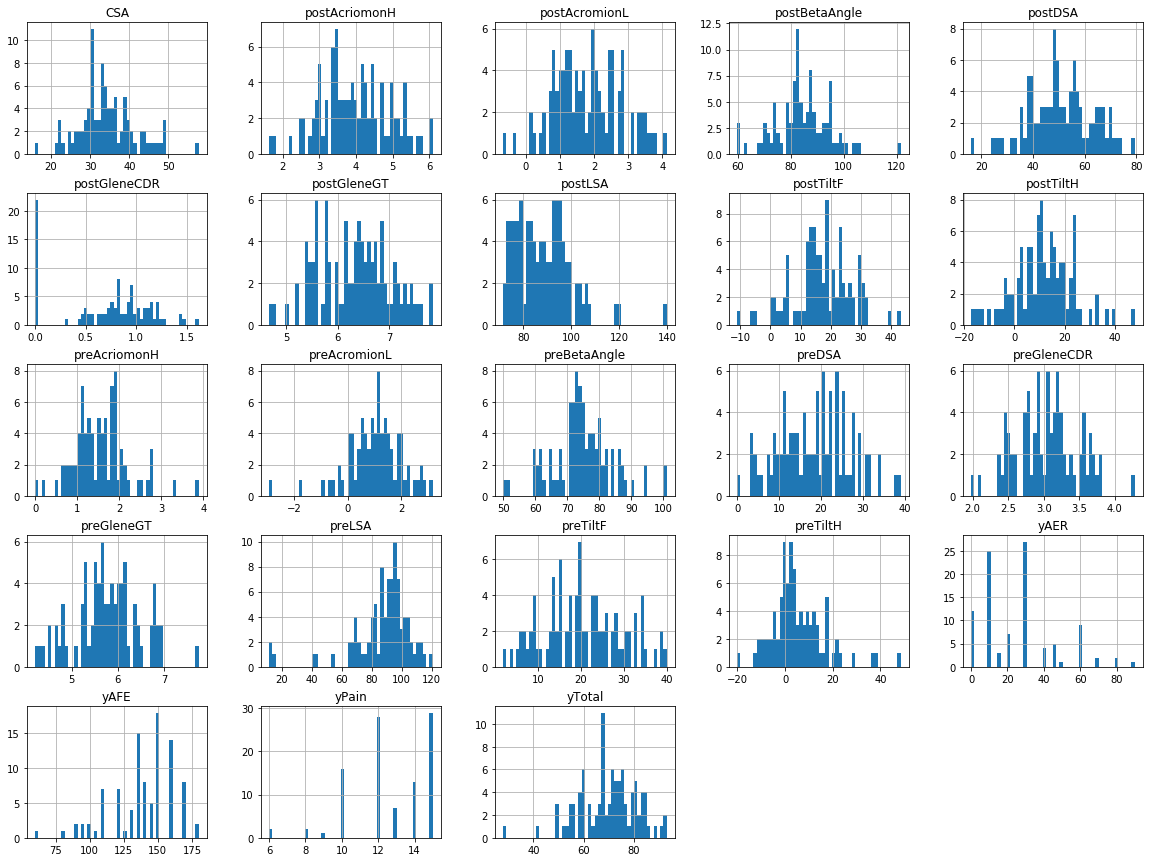

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()